# Market Basket Analysis

## Load the dataset

Load the `online_retail.xlsx` dataset into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data from the excel file into a DataFrame, then display the first 5 rows.



In [3]:
dataset = "/content/drive/MyDrive/MarketBasedAnalysis/online_retail.xlsx"
import pandas as pd

df = pd.read_excel(dataset)
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Explore the data

Perform initial data exploration to understand the structure, content, and quality of the data. This includes checking for missing values, data types, and summary statistics.


**Reasoning**:
Perform initial data exploration by displaying column information, checking for missing values, and showing descriptive statistics.



In [4]:
df.info()
display(df.isnull().sum())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## Prepare the data for market basket analysis

Prepare the data for market basket analysis by handling missing values, cleaning relevant columns, and transforming the data into a transaction-based format.


**Reasoning**:
I need to prepare the data for market basket analysis by handling missing values, cleaning relevant columns, and transforming the data into a transaction-based format as per the instructions. I will start by removing rows with missing 'Description' and 'CustomerID', then remove rows with non-positive 'Quantity', convert 'InvoiceNo' to string, calculate 'TotalPrice', and finally pivot the data to get the transaction format.



In [5]:
df.dropna(subset=['Description', 'CustomerID'], inplace=True)
df = df[df['Quantity'] > 0]
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_encoded = basket.applymap(encode_units)

/tmp/ipython-input-2017404738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceNo'] = df['InvoiceNo'].astype(str)
/tmp/ipython-input-2017404738.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
/tmp/ipython-input-2017404738.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket.applymap(encode_units)


## Implement the apriori algorithm

Apply the Apriori algorithm to identify frequent itemsets in the dataset.


**Reasoning**:
Apply the Apriori algorithm to find frequent itemsets and then generate association rules based on those itemsets.



In [6]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(basket_encoded, min_support=0.03, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
display(frequent_itemsets.head())
display(rules.head())

/usr/local/lib/python3.12/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: Dep

,support,itemsets
0,0.039167,(6 RIBBONS RUSTIC CHARM)
1,0.035445,(60 TEATIME FAIRY CAKE CASES)
2,0.042566,(ALARM CLOCK BAKELIKE GREEN)
3,0.033071,(ALARM CLOCK BAKELIKE PINK)
4,0.047313,(ALARM CLOCK BAKELIKE RED )


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

## Analyze and interpret the results

Analyze and interpret the generated association rules to extract meaningful insights about customer purchasing patterns.


**Reasoning**:
Examine the `rules` DataFrame and analyze its content to interpret the market basket analysis results.



In [7]:
if not rules.empty:
    sorted_rules = rules.sort_values(by=['confidence', 'lift'], ascending=False)
    display(sorted_rules.head())
else:
    print("The rules DataFrame is empty. This means no association rules with the specified minimum support (0.03) and minimum lift threshold (1) were found.")
    print("This could be due to:")
    print("- The minimum support value is too high, making it difficult to find frequent itemsets.")
    print("- The minimum lift threshold is too high, filtering out potential associations.")
    print("- There are no strong positive associations (lift >= 1) between items in the dataset based on the chosen parameters.")


The rules DataFrame is empty. This means no association rules with the specified minimum support (0.03) and minimum lift threshold (1) were found.
This could be due to:
- The minimum support value is too high, making it difficult to find frequent itemsets.
- The minimum lift threshold is too high, filtering out potential associations.
- There are no strong positive associations (lift >= 1) between items in the dataset based on the chosen parameters.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

## Visualize the results

Visualize the frequent itemsets or association rules to help understand the patterns.


**Reasoning**:
The previous steps indicated that no association rules were found with the chosen parameters. The task is to visualize the frequent itemsets. I will sort the frequent itemsets by support and visualize the top 10 frequent itemsets using a bar plot to understand the most frequent items.



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

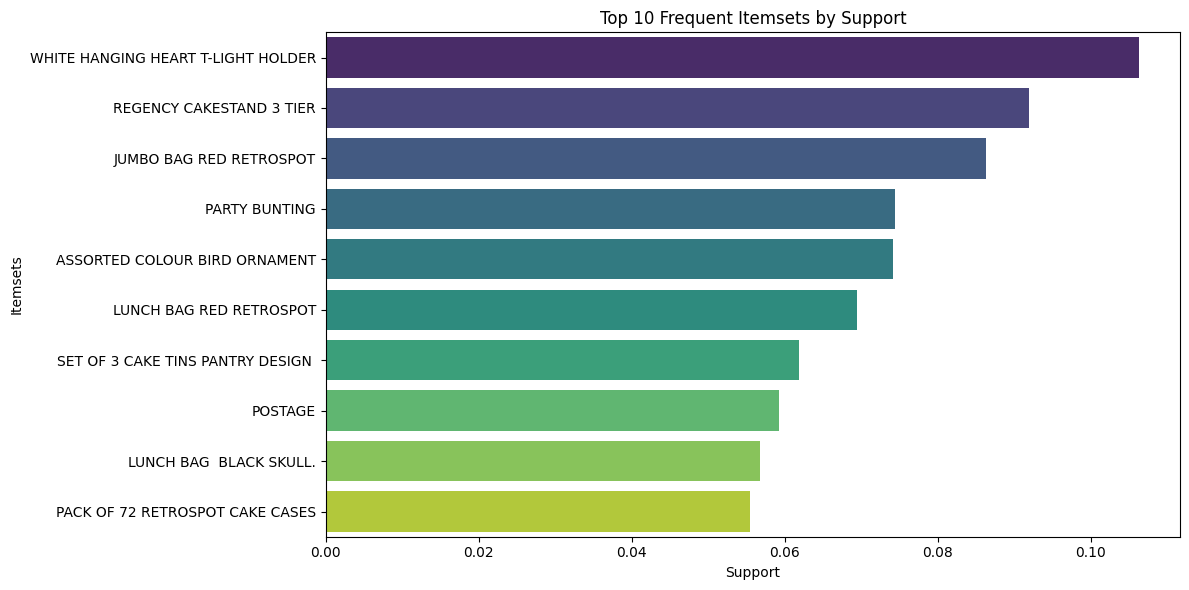

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

if not frequent_itemsets.empty:
    # Sort frequent itemsets by support
    frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)

    # Select top N itemsets for visualization
    top_n = 10
    frequent_itemsets_top_n = frequent_itemsets_sorted.head(top_n)

    # Extract itemset descriptions for plotting
    itemset_descriptions = frequent_itemsets_top_n['itemsets'].apply(lambda x: ', '.join(list(x)))

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=frequent_itemsets_top_n['support'], y=itemset_descriptions, palette='viridis')
    plt.title(f'Top {top_n} Frequent Itemsets by Support')
    plt.xlabel('Support')
    plt.ylabel('Itemsets')
    plt.tight_layout()
    plt.show()
else:
    print("The frequent_itemsets DataFrame is empty. Cannot visualize frequent itemsets.")


## Summary:

### Data Analysis Key Findings

*   The dataset contains 541,909 entries and 8 columns, with missing values in the `Description` (1454) and `CustomerID` (135,080) columns.
*   Negative values in `Quantity` and `UnitPrice` were identified as data quality issues that require cleaning.
*   After cleaning and preprocessing, the data was successfully transformed into a transaction-based format, resulting in a `basket_encoded` DataFrame ready for analysis.
*   The Apriori algorithm was successfully applied to identify frequent itemsets.
*   No association rules with a lift greater than or equal to 1 were found with the initial parameters (minimum support 0.03 and minimum lift 1).
*   The top 10 frequent itemsets were successfully identified and visualized based on their support.

### Insights or Next Steps

*   Consider lowering the `min_support` and/or `min_threshold` for lift in the Apriori algorithm to potentially discover association rules.
*   Investigate the specific items present in the top frequent itemsets to understand which combinations are most commonly purchased together, even without strong positive associations (lift >= 1).
